In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno
from sklearn import preprocessing
from scipy import stats

In [2]:
df = pd.read_csv('C:/Users/amrutha/Desktop/IDS/data.csv',encoding = "ISO-8859-1",parse_dates=['date'])
print('Size of dataframe is :',df.shape)
df.head()

Size of dataframe is : (435742, 13)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-01-02
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-01-02
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-01-02
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-01-03
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-01-03


In [3]:
missing_ratio = np.round(df.isna().sum()/len(df)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)


,Missing_Ratio
pm2_5,97.86
spm,54.48
agency,34.30
stn_code,33.06
rspm,9.23
so2,7.95
location_monitoring_station,6.31
no2,3.73
type,1.24
sampling_date,0.00


In [4]:
df.columns.values.tolist()
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)
print('\nNumerical Columns : ' , num_cols)
print('\nCategorical Columns : ' , cat_cols)


Numerical Columns :  ['so2', 'no2', 'rspm', 'spm', 'pm2_5', 'date']

Categorical Columns :  ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'location_monitoring_station']


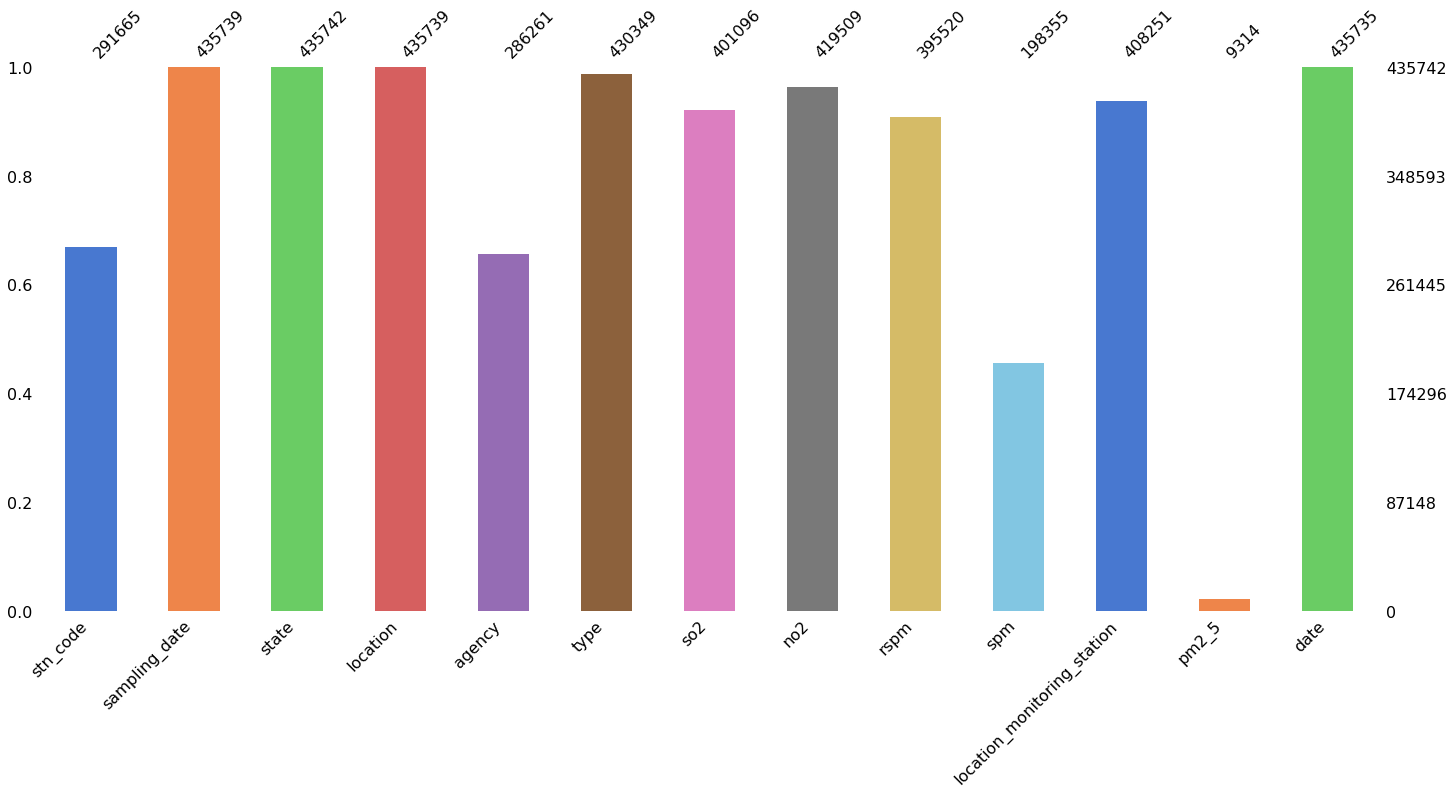

In [5]:
#visualizing missing values using the missingno value
msno.bar(df,color=sns.color_palette('muted'))

In [6]:
#cleaning the dataset

#1.The pm2_5 has 94% Nan values.Hence it wil be replaced by 0.
df['pm2_5'].replace(np.nan, 0, inplace=True)
df.head()



,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,0.0,1990-01-02
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,0.0,1990-01-02
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,0.0,1990-01-02
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,0.0,1990-01-03
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,0.0,1990-01-03


In [7]:
#2.the spm column has 54% na values.It will be filled with the mean of that column
print(df['spm'].mean())
df['spm'].fillna(df['spm'].mean(),inplace=True)
df.head()

220.78347959832885


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,220.78348,NaN,0.0,1990-01-02
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,220.78348,NaN,0.0,1990-01-02
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,220.78348,NaN,0.0,1990-01-02
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,220.78348,NaN,0.0,1990-01-03
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,220.78348,NaN,0.0,1990-01-03


In [8]:
#3.Cleaning of categorical columns.

df['agency'].fillna(method='bfill', inplace=True)
df['stn_code'].fillna(method='ffill', inplace=True)
df['location_monitoring_station'].fillna(method='bfill', inplace=True)
df['sampling_date'].fillna(method='ffill', inplace=True)
df['date'].fillna(method='ffill', inplace=True)
df['location'].fillna("PORTBLAIR",limit=1,inplace=True)
df['location'].fillna("KAVARATTI",limit=1,inplace=True)
df['location'].fillna("AGARTALA",limit=1,inplace=True)


print(df['agency'].isna().sum())
print(df['stn_code'].isna().sum())
print(df['location_monitoring_station'].isna().sum())
print(df['sampling_date'].isna().sum())
print(df['date'].isna().sum())
print(df['location'].isna().sum())
df.tail()


3
0
3
0
0
0


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,SAMP,29-12-2015,andaman-and-nicobar-islands,PORTBLAIR,NaN,NaN,NaN,NaN,NaN,220.78348,NaN,0.0,2015-12-29
435740,SAMP,29-12-2015,Lakshadweep,KAVARATTI,NaN,NaN,NaN,NaN,NaN,220.78348,NaN,0.0,2015-12-29
435741,SAMP,29-12-2015,Tripura,AGARTALA,NaN,NaN,NaN,NaN,NaN,220.78348,NaN,0.0,2015-12-29


In [9]:
df['agency'].fillna("Andaman and Nicobar Pollution Control Board",limit=1,inplace=True)
df['agency'].fillna("Lakshadweep Pollution Control Board",limit=1,inplace=True)
df['agency'].fillna("Tripura State Pollution Control Board",limit=1,inplace=True)
df['location_monitoring_station'].fillna(method='ffill', inplace=True)
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,SAMP,29-12-2015,andaman-and-nicobar-islands,PORTBLAIR,Andaman and Nicobar Pollution Control Board,NaN,NaN,NaN,NaN,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435740,SAMP,29-12-2015,Lakshadweep,KAVARATTI,Lakshadweep Pollution Control Board,NaN,NaN,NaN,NaN,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435741,SAMP,29-12-2015,Tripura,AGARTALA,Tripura State Pollution Control Board,NaN,NaN,NaN,NaN,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29


In [10]:
#4.The column type has about 1% na values.We will fill those values with the most repeating or mode of that column
print(df['type'].value_counts())
df['type'].fillna('Residential, Rural and other Areas',inplace=True)
df.tail()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,SAMP,29-12-2015,andaman-and-nicobar-islands,PORTBLAIR,Andaman and Nicobar Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435740,SAMP,29-12-2015,Lakshadweep,KAVARATTI,Lakshadweep Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435741,SAMP,29-12-2015,Tripura,AGARTALA,Tripura State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29


count    401096.000000
mean         10.829414
std          11.177187
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

Distribution of SO2


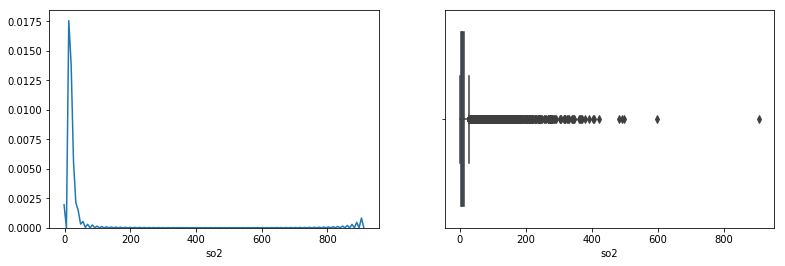

Skewness =  8.521065650112753
Distribution of SO2 after removing the outliers


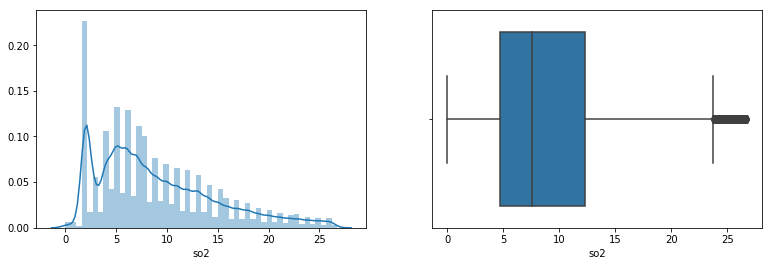

Skewness =  0.8881591876191177


In [11]:
print(df['so2'].describe())
print()
print('Distribution of SO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['so2'].dropna() , ax=ax[0],hist=False)
sns.boxplot(df['so2'].dropna() , ax=ax[1])
so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)
#from the graphs the data is right skewed and has many outliers

#remove outliers
dfo=df.copy()
Q1=df['so2'].quantile(0.25)
Q3=df['so2'].quantile(0.75)
IQR=Q3-Q1
dfo=dfo[~((dfo['so2']<(Q1-1.5*IQR))|(dfo['so2']>(Q3+1.5*IQR)))]
print('Distribution of SO2 after removing the outliers')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(dfo['so2'].dropna(),ax=ax[0])
sns.boxplot(dfo['so2'].dropna() , ax=ax[1])
so2_skew = dfo['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)



Distribution of SO2


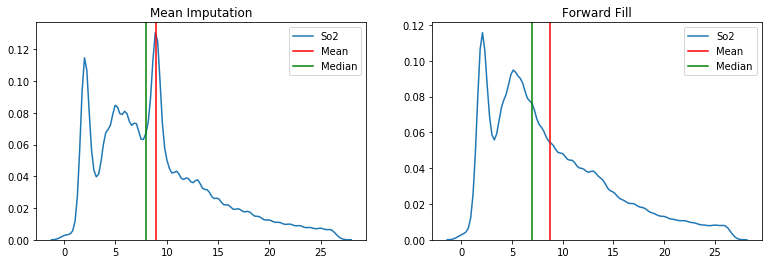

In [12]:
df1= dfo.copy()
df2=dfo.copy()
df1['so2'] = df1['so2'].fillna(df1['so2'].mean())
df2['so2'] = df2['so2'].fillna(method='ffill')
print('Distribution of SO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['so2'] , ax=ax[0]);
ax[0].axvline(df1['so2'].mean(), color='r' )
ax[0].axvline(df1['so2'].median(), color='g')
ax[0].set_title('Mean Imputation')  
ax[0].legend(['So2','Mean','Median'])

sns.kdeplot(df2['so2'] , ax=ax[1]) #kernel density plot
ax[1].axvline(df2['so2'].mean(), color='r')
ax[1].axvline(df2['so2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['So2','Mean','Median'])
plt.show()

Distribution of NO2


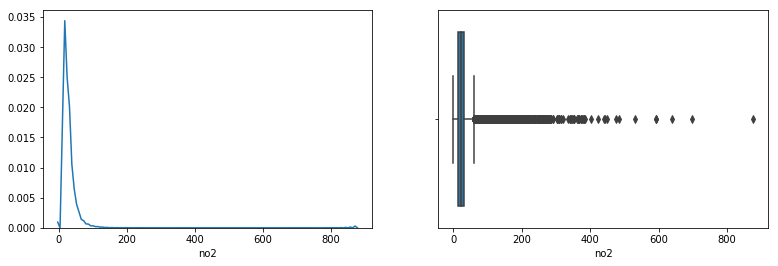

Skewness =  3.676816370951358
Distribution of NO2 after removing outliers 


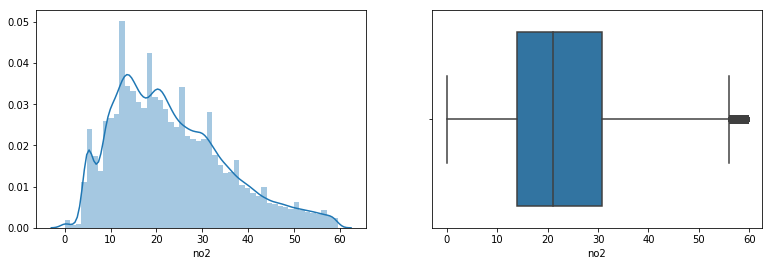

Skewness =  0.7001735252069144


In [13]:
df['no2'].describe()
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0],hist=False,kde=True)
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

#removing outliers
dfout=df.copy()
Q1=dfout['no2'].quantile(0.25)
Q3=dfout['no2'].quantile(0.75)
IQR=Q3-Q1
dfout=dfout[~((dfout['no2']<(Q1-1.5*IQR))|(dfout['no2']>(Q3+1.5*IQR)))]
print('Distribution of NO2 after removing outliers ')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(dfout['no2'].dropna() , ax=ax[0])
sns.boxplot(dfout['no2'].dropna() , ax=ax[1])
no2_skew = dfout['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

Distribution of NO2


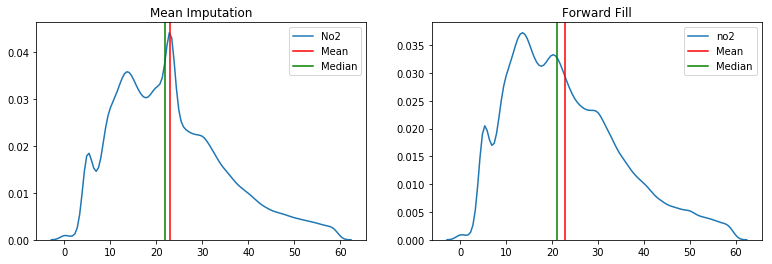

In [14]:
df1= dfout.copy()
df2= dfout.copy()
#Mean Imputation
df1['no2'] = df1['no2'].fillna(df1['no2'].mean())
#Forward Fill
df2['no2'] = df2['no2'].fillna(method='ffill')
print('Distribution of NO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['no2'] , ax=ax[0])
ax[0].axvline(df1['no2'].mean(), color='r' )
ax[0].axvline(df1['no2'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['No2','Mean','Median'])

sns.kdeplot(df2['no2'] , ax=ax[1])
ax[1].axvline(df2['no2'].mean(), color='r')
ax[1].axvline(df2['no2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['no2','Mean','Median'])
                    
plt.show()

Distribution of NO2


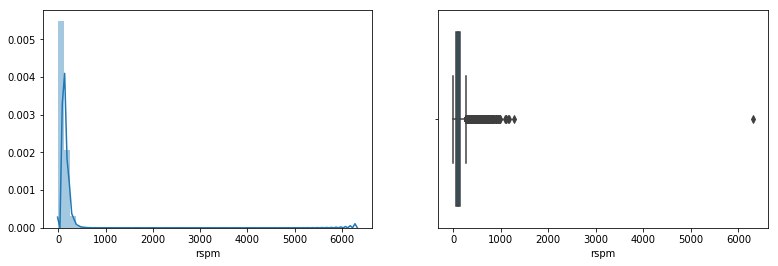

Skewness =  3.2136768410137697
Distribution of NO2 after removing outliers 


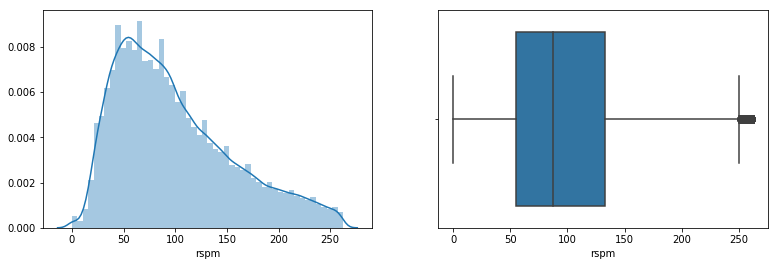

Skewness =  0.7975367465101172


In [15]:
df['rspm'].describe()
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
rspm_skew = df['rspm'].skew()
plt.show()
print('Skewness = ',rspm_skew)

#removing outliers
dfot=df.copy()
Q1=dfout['rspm'].quantile(0.25)
Q3=dfout['rspm'].quantile(0.75)
IQR=Q3-Q1
dfot=dfot[~((dfot['rspm']<(Q1-1.5*IQR))|(dfot['rspm']>(Q3+1.5*IQR)))]
print('Distribution of NO2 after removing outliers ')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(dfot['rspm'].dropna() , ax=ax[0])
sns.boxplot(dfot['rspm'].dropna() , ax=ax[1])
rspm_skew = dfot['rspm'].skew()
plt.show()
print('Skewness = ',rspm_skew)

In [16]:
print(df['so2'].mean())
print(df['no2'].mean())
print(df['rspm'].mean())
print("-----------------")

dfcopy=df.copy()
df1copy=df.copy()
dfcopy['so2'].fillna(dfcopy['so2'].mean(),inplace=True)
dfcopy['no2'].fillna(dfcopy['no2'].mean(),inplace=True)
dfcopy['rspm'].fillna(dfcopy['rspm'].mean(),inplace=True)

df1copy['so2'].fillna(method="ffill",inplace=True)
df1copy['no2'].fillna(method="ffill",inplace=True)
df1copy['rspm'].fillna(method="ffill",inplace=True)

print(dfcopy['so2'].mean())
print(dfcopy['no2'].mean())
print(dfcopy['rspm'].mean())
print("-----------------")
print(df1copy['so2'].mean())
print(df1copy['no2'].mean())
print(df1copy['rspm'].mean())

10.829414322671498
25.80962289781295
108.83278418538401
-----------------
10.829414322670432
25.80962289781676
108.83278418540205
-----------------
10.557700561339697
25.586002635899234
109.53411602555397


In [17]:
df['so2'].fillna(df['so2'].mean(),inplace=True)
df['no2'].fillna(df['no2'].mean(),inplace=True)
df['rspm'].fillna(df['rspm'].mean(),inplace=True)
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,SAMP,29-12-2015,andaman-and-nicobar-islands,PORTBLAIR,Andaman and Nicobar Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435740,SAMP,29-12-2015,Lakshadweep,KAVARATTI,Lakshadweep Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435741,SAMP,29-12-2015,Tripura,AGARTALA,Tripura State Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29


stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64


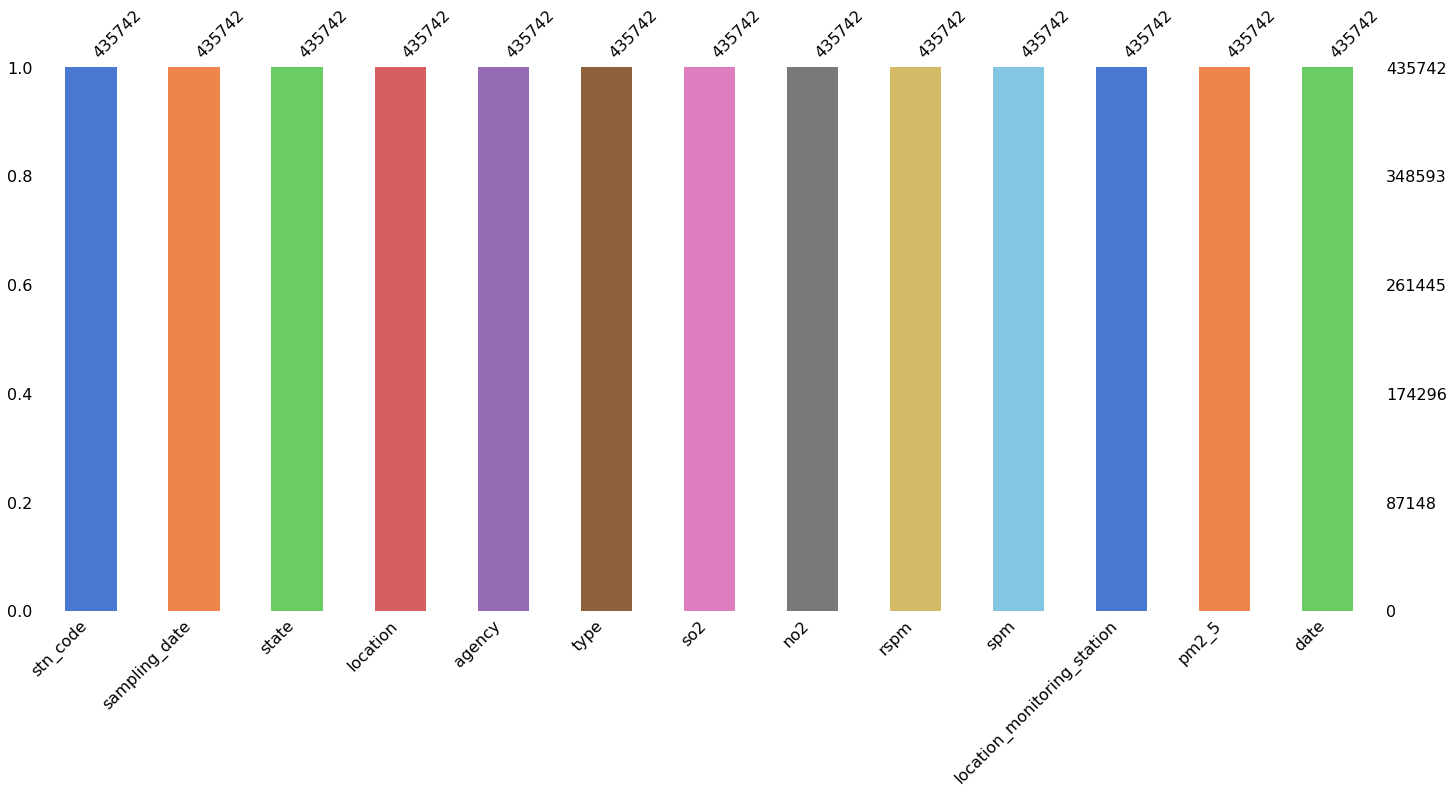

In [18]:
#visualizing missing values using the missingno value
msno.bar(df,color=sns.color_palette('muted'))
print(df.isna().sum())

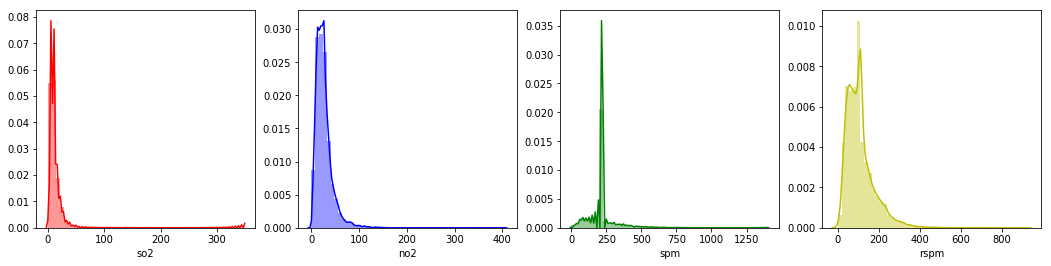

In [19]:
fig = plt.figure(figsize = (18,4))
dfsample=df.sample(10000)
plt.subplot(1,4,1)
sns.distplot(dfsample['so2'],color='r')
plt.subplot(1,4,2)
sns.distplot(dfsample['no2'],color='b')
plt.subplot(1,4,3)
sns.distplot(dfsample['spm'],color='g')
plt.subplot(1,4,4)
sns.distplot(dfsample['rspm'],color='y')

Distribution of NO2


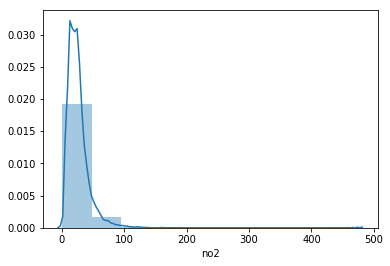

25.49564058181235
17.852458150923205
----------------------------------
Distribution after normalizing


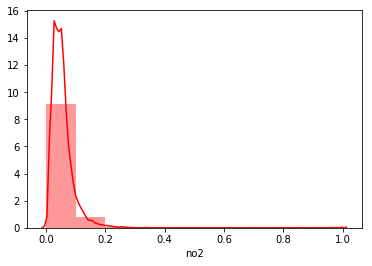

----------------------------------
Distribution after standardising


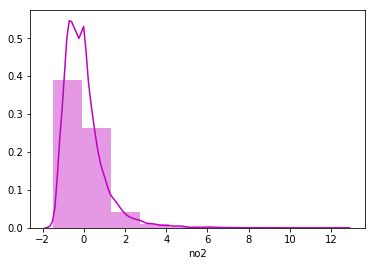

Values in original dataset
0    17.4
1     7.0
2    28.5
3    14.7
4     7.5
5    25.7
6    17.1
7     8.7
8    23.0
9     8.9
Name: no2, dtype: float64
----------------------------------
Values After normalisation
381900    0.106316
423493    0.165684
362447    0.054737
48128     0.024000
74785     0.013053
118654    0.067368
140893    0.085474
293860    0.065263
351833    0.035368
76672     0.023158
Name: no2, dtype: float64
----------------------------------
Values After standardisation
36320    -0.820595
381850   -0.486370
254203    0.418344
343130    1.628471
181965    0.303094
49470     0.245469
427261    0.014968
43900    -0.618908
398296    0.821720
245462   -0.791783
Name: no2, dtype: float64
-8.544553953271361e-17
1.000000000000003


In [20]:
df1=df.sample(10000)
df2=df.sample(10000)

print('Distribution of NO2')
sns.distplot(df1['no2'],bins=10)
plt.show()
print(df1["no2"].mean())
print(df1["no2"].std())

#normalisation
x=df1["no2"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
df1['no2']=scaled_array
print("----------------------------------")
print("Distribution after normalizing")
sns.distplot(df1["no2"],bins=10,color="r")
plt.show()

#standardisation [mean=0 and variance=1]
x=df2["no2"].values
#sarray=(x-x.mean())/x.std()
tarray=stats.zscore(x, axis=0, ddof=1)
df2["no2"]=tarray
print("----------------------------------")
print("Distribution after standardising")
sns.distplot(df2["no2"],color="m",bins=10)
plt.show()



print("Values in original dataset")
print(df["no2"][0:10])
print("----------------------------------")
print("Values After normalisation")
print(df1["no2"][0:10])
print("----------------------------------")
print("Values After standardisation")
print(df2["no2"][0:10])
print(df2["no2"].mean())
print(df2["no2"].std())
 


Distribution of SO2


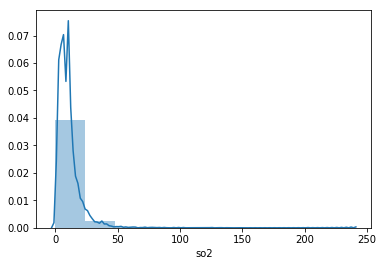

10.679256688782528
9.949846043680472
----------------------------------
Distribution after normalizing


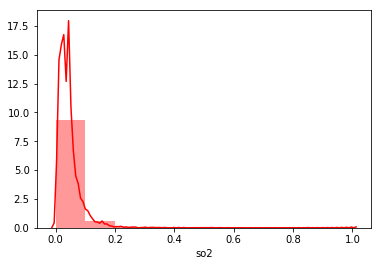

----------------------------------
Distribution after standardising


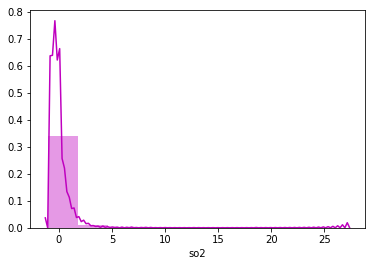

Values in original dataset
0    4.8
1    3.1
2    6.2
3    6.3
4    4.7
5    6.4
6    5.4
7    4.7
8    4.2
9    4.0
Name: so2, dtype: float64
----------------------------------
Values After normalisation
381900    0.142017
423493    0.035714
362447    0.050420
48128     0.028151
74785     0.008403
118654    0.004202
140893    0.073109
293860    0.075630
351833    0.097059
76672     0.029412
Name: so2, dtype: float64
----------------------------------
Values After standardisation
36320    -0.499383
381850   -0.006234
254203   -0.082983
343130   -0.268050
181965    1.212485
49470    -0.006234
427261   -0.082983
43900    -0.268050
398296   -0.730717
245462   -0.545650
Name: so2, dtype: float64
-1.8716694860643202e-16
1.0000000000000087


In [21]:
print('Distribution of SO2')
sns.distplot(df1['so2'].dropna(),bins=10)
plt.show()
print(df1["so2"].mean())
print(df1["so2"].std())

x=df1["so2"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
df1['so2']=scaled_array
print("----------------------------------")
print("Distribution after normalizing")
sns.distplot(df1["so2"],bins=10,color="r")
plt.show()

#standardisation [mean=0 and variance=1]
x=df2["so2"].values
#sarray=(x-x.mean())/x.std()
tarray=stats.zscore(x, axis=0, ddof=1)
df2["so2"]=tarray
print("----------------------------------")
print("Distribution after standardising")
sns.distplot(df2["so2"],color="m",bins=10)
plt.show()



print("Values in original dataset")
print(df["so2"][0:10])
print("----------------------------------")
print("Values After normalisation")
print(df1["so2"][0:10])
print("----------------------------------")
print("Values After standardisation")
print(df2["so2"][0:10])
print(df2["so2"].mean())
print(df2["so2"].std())
 


Distribution of RSPM


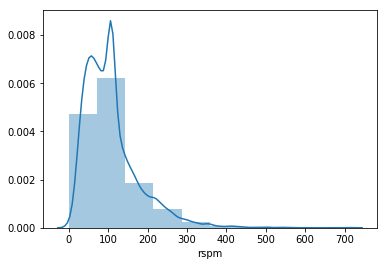

107.78296054502574
70.08111037424358
----------------------------------
Distribution after normalizing


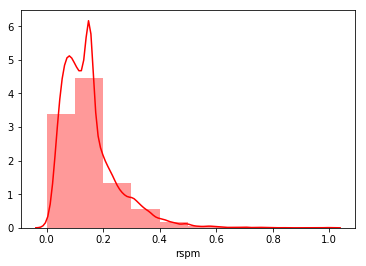

----------------------------------
Distribution after standardising


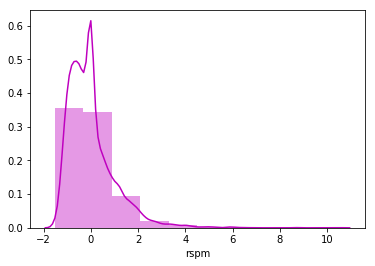

Values in original dataset
1110     90.0
1111     57.0
1112     87.7
1113    118.3
1114     76.3
1115     92.0
1116    111.7
1117     63.7
1118     75.0
1119     86.0
Name: rspm, dtype: float64
----------------------------------
Values After normalisation
391201    0.206416
247328    0.092050
61904     0.117155
308673    0.237099
317665    0.139470
347831    0.051604
348854    0.041841
84624     0.105997
244740    0.138075
311175    0.178522
Name: rspm, dtype: float64
----------------------------------
Values After standardisation
194822    0.260617
46063    -0.008192
26665    -0.008192
79006    -0.707069
388645    3.913984
243803    0.849644
301448    1.747208
107036   -0.008192
205321    0.611228
40301    -0.398532
Name: rspm, dtype: float64
8.578693311278585e-17
1.0000000000000002


In [22]:
print('Distribution of RSPM')
sns.distplot(df1['rspm'].dropna(),bins=10)
plt.show()
print(df1["rspm"].mean())
print(df1["rspm"].std())

x=df1["rspm"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
df1['rspm']=scaled_array
print("----------------------------------")
print("Distribution after normalizing")
sns.distplot(df1["rspm"],bins=10,color="r")
plt.show()

#standardisation [mean=0 and variance=1]
x=df2["rspm"].values
#sarray=(x-x.mean())/x.std()
tarray=stats.zscore(x, axis=0, ddof=1)
df2["rspm"]=tarray
print("----------------------------------")
print("Distribution after standardising")
sns.distplot(df2["rspm"],color="m",bins=10)
plt.show()



print("Values in original dataset")
print(df["rspm"][1110:1120])
print("----------------------------------")
print("Values After normalisation")
print(df1["rspm"][1110:1120])
print("----------------------------------")
print("Values After standardisation")
print(df2["rspm"][1110:1120])
print(df2["rspm"].mean())
print(df2["rspm"].std())
 

Distribution of SPM


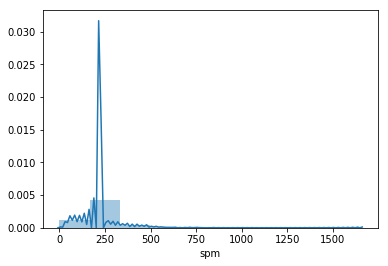

219.53290207863273
103.21400231718322
----------------------------------
Distribution after normalizing


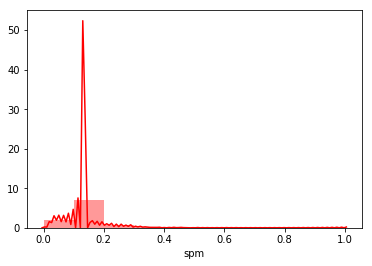

----------------------------------
Distribution after standardising


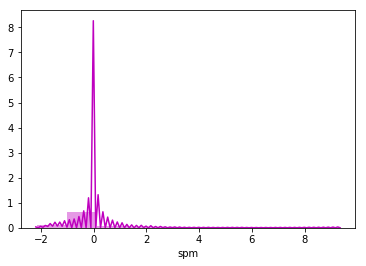

Values in original dataset
1110    227.0
1111    181.0
1112    244.7
1113    266.3
1114    198.3
1115    237.7
1116    301.0
1117    195.0
1118    213.0
1119    261.7
Name: spm, dtype: float64
----------------------------------
Values After normalisation
391201    0.133485
247328    0.133485
61904     0.133485
308673    0.133485
317665    0.133485
347831    0.029625
348854    0.030834
84624     0.110641
244740    0.133485
311175    0.133485
Name: spm, dtype: float64
----------------------------------
Values After standardisation
194822   -0.017967
46063     0.753136
26665     0.551267
79006    -0.017967
388645    3.925349
243803   -0.017967
301448   -0.017967
107036   -1.775023
205321    0.637782
40301    -0.017967
Name: spm, dtype: float64
1.4459683450596117e-16
1.0000000000000486


In [23]:
print('Distribution of SPM')
sns.distplot(df1['spm'].dropna(),bins=10)
plt.show()
print(df1["spm"].mean())
print(df1["spm"].std())

x=df1["spm"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
df1['spm']=scaled_array
print("----------------------------------")
print("Distribution after normalizing")
sns.distplot(df1["spm"],bins=10,color="r")
plt.show()

#standardisation [mean=0 and variance=1]
x=df2["spm"].values
#sarray=(x-x.mean())/x.std()
tarray=stats.zscore(x, axis=0, ddof=1)
df2["spm"]=tarray
print("----------------------------------")
print("Distribution after standardising")
sns.distplot(df2["spm"],color="m",bins=10)
plt.show()



print("Values in original dataset")
print(df["spm"][1110:1120])
print("----------------------------------")
print("Values After normalisation")
print(df1["spm"][1110:1120])
print("----------------------------------")
print("Values After standardisation")
print(df2["spm"][1110:1120])
print(df2["spm"].mean())
print(df2["spm"].std())
 

Distribution of PM2


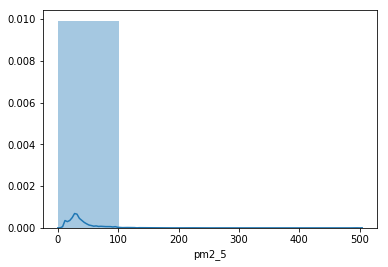

434
count    435742.000000
mean          0.871919
std           7.424595
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         504.000000
Name: pm2_5, dtype: float64


In [24]:
print('Distribution of PM2')
sns.distplot(df['pm2_5'],bins=5)
plt.show()
values=[]
print(df["pm2_5"].nunique())
print(df["pm2_5"].describe())


In [25]:
#Analysis

Text(0, 0.5, 'State')

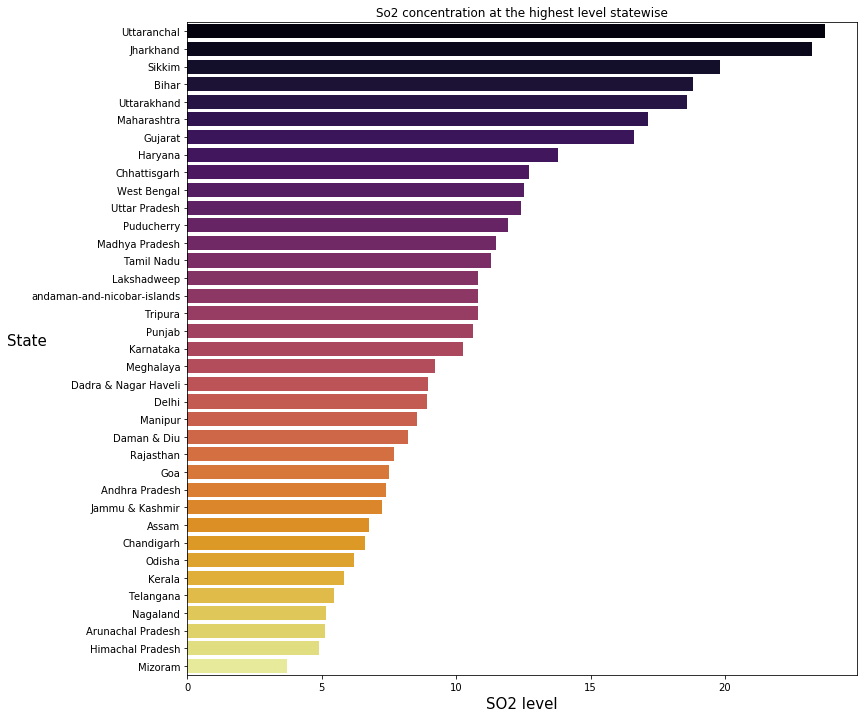

In [26]:
plt.figure(figsize = (12,12))
so2_level  = df.groupby(['state']).mean()['so2'].sort_values(ascending = False).to_frame()
sns.barplot(x = 'so2', y = so2_level.index,data = so2_level,palette='inferno')
plt.title('So2 concentration at the highest level statewise')
plt.xlabel('SO2 level',fontsize = 15)
plt.ylabel('State',fontsize = 15,rotation = 'horizontal')

Text(0, 0.5, 'State')

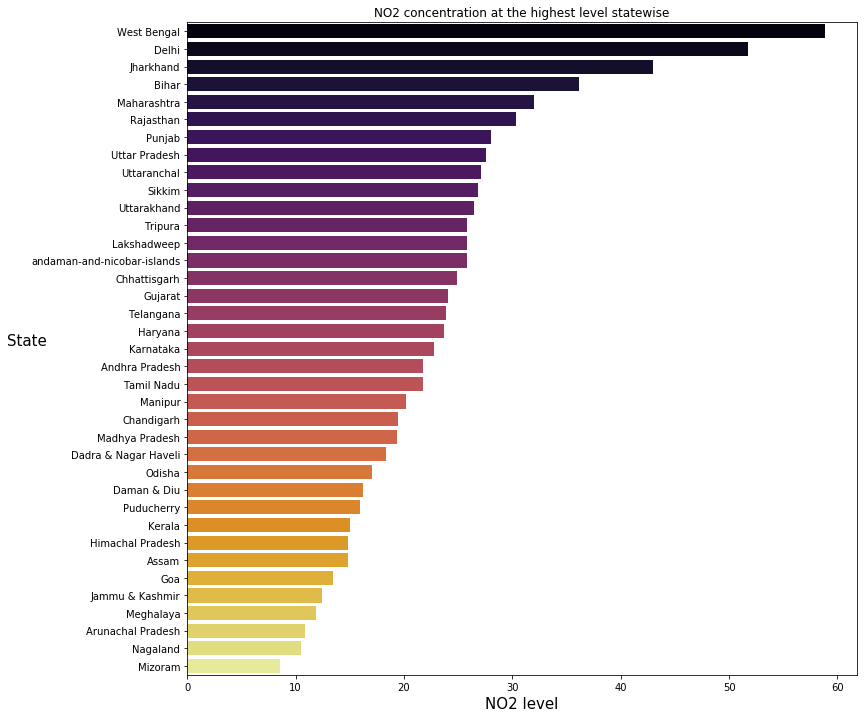

In [27]:
plt.figure(figsize = (12,12))
no2_level  = df.groupby(['state']).mean()['no2'].sort_values(ascending = False).to_frame()
sns.barplot(x = 'no2', y = no2_level.index,data = no2_level,palette='inferno')
plt.title('NO2 concentration at the highest level statewise')
plt.xlabel('NO2 level',fontsize = 15)
plt.ylabel('State',fontsize = 15,rotation = 'horizontal')

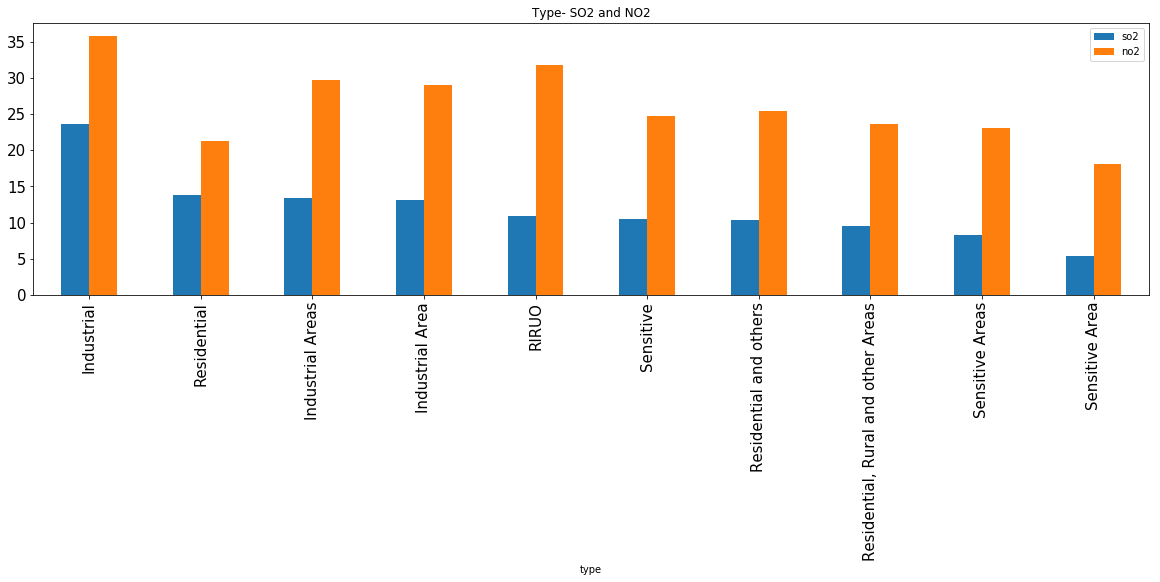

In [28]:
type_pollution = df[['type', 'so2', 'no2']].groupby('type').mean()
type_pollution.reset_index(inplace = True)
type_pollution.sort_values('so2', ascending= False, inplace = True)
type_pollution.plot(kind = 'bar', figsize= (20,5), x = 'type', fontsize= 15, title = 'Type- SO2 and NO2')
plt.show()

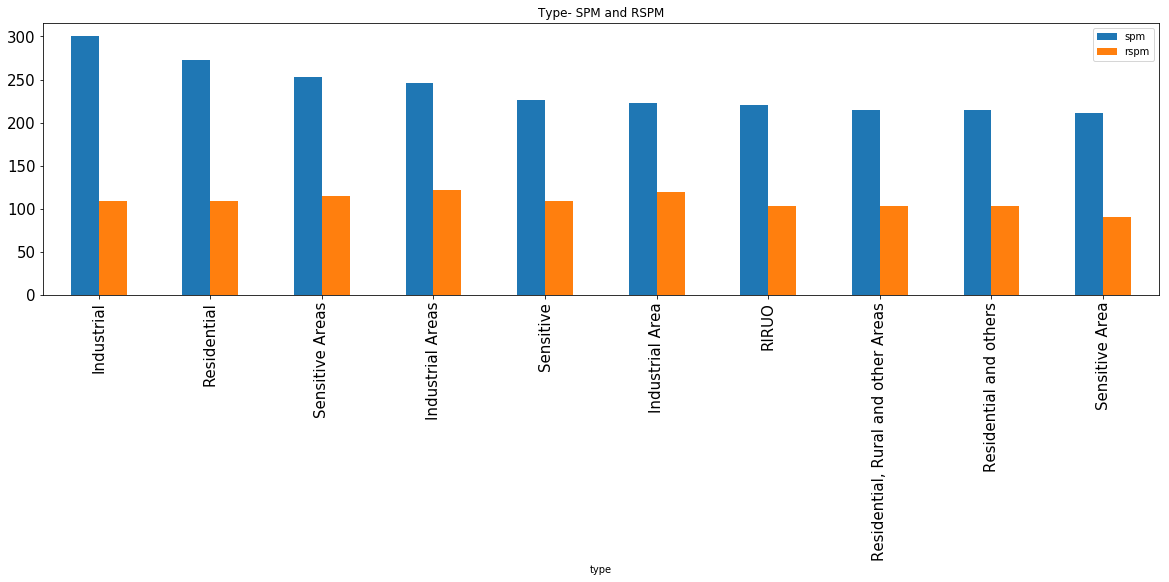

In [29]:
type_pollution1 = df[['type', 'spm', 'rspm']].groupby('type').mean()
type_pollution1.reset_index(inplace = True)
type_pollution1.sort_values('spm', ascending= False, inplace = True)
type_pollution1.plot(kind = 'bar', figsize= (20,5), x = 'type', fontsize= 15, title = 'Type- SPM and RSPM')

In [30]:
# Adding new column for year.
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",0.0,1990-01-02,1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,Industrial Area,3.1,7.0,108.832784,220.78348,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",0.0,1990-01-02,1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",0.0,1990-01-02,1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",0.0,1990-01-03,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,Industrial Area,4.7,7.5,108.832784,220.78348,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",0.0,1990-01-03,1990


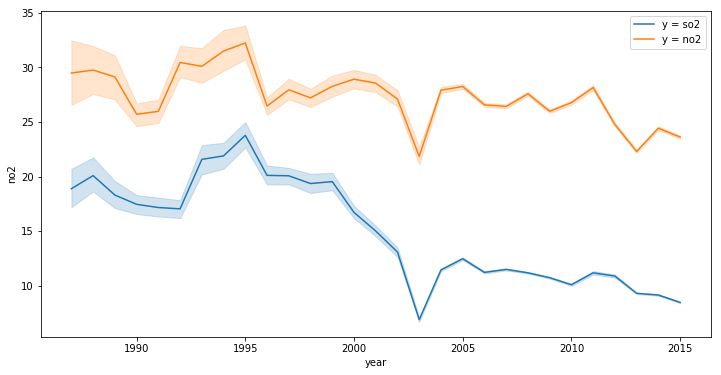

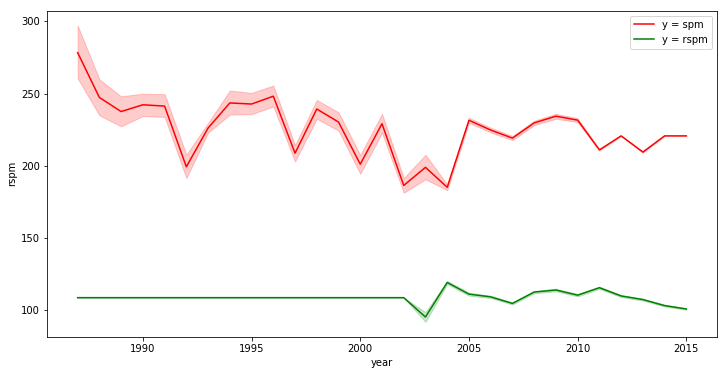

In [35]:
# SO2 and NO2 Trend in India by year
plt.figure(figsize = (12,6))
sns.lineplot(x='year', y='so2', data=df)
sns.lineplot(x='year',y='no2' ,data=df)
plt.legend(['y = so2', 'y = no2'], loc='upper right')
plt.show()

# SPM and RSPM Trend in India by year
plt.figure(figsize = (12,6))
sns.lineplot(x='year', y='spm', data=df,color="red")
sns.lineplot(x='year',y='rspm' ,data=df,color="green")
plt.legend(['y = spm', 'y = rspm'], loc='upper right')
plt.show()



In [43]:
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
from math import sqrt

dfop=df.copy()
x=df["so2"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
dfop['so2']=scaled_array

x=df["no2"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
dfop['no2']=scaled_array

x=df["spm"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
dfop['spm']=scaled_array

x=df["rspm"].values #conversion into numpy array
x1=x.reshape(-1, 1) #converting into 2d array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x1)
dfop['rspm']=scaled_array



In [44]:
South=['Andhra Pradesh','Karnataka','Kerala',  'Maharashtra','Odisha', 'Puducherry','Tamil Nadu', 'Telangana', 'Goa']
North=['Delhi', 'Gujarat', 'Haryana','Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand','Arunachal Pradesh', 'Assam', 'Bihar','Chandigarh', 'Chhattisgarh', 'Madhya Pradesh','Manipur', 'Meghalaya', 'Rajasthan', 'Sikkim','Uttar Pradesh','Uttarakhand', 'Uttaranchal', 'West Bengal','Tripura','Mizoram', 'Nagaland','Punjab']

south=dfop.loc[dfop['state'].isin(South)]
north=dfop.loc[dfop['state'].isin(North)]

print(south.shape)
print(north.shape)
print(dfop.shape)

south['total']=south['so2']+south['no2']+south['spm']+south['rspm']+south['pm2_5']
north['total']=north['so2']+north['no2']+north['spm']+north['rspm']+north['pm2_5']

dfop['total']=dfop['so2']+dfop['no2']+dfop['spm']+dfop['rspm']+dfop['pm2_5']
print("Mean of sample of 25000 lakh of north indian states:",north['total'].sample(25000).mean())
print("Mean of sample of 25000 lakh of south indian states:",south['total'].sample(25000).mean())
print("Standard Deviation of sample of 25000 lakh of north indian states:",north['total'].sample(25000).std())
print("Standard Deviation of sample of 25000 lakh of north indian states:",north['total'].sample(25000).std())

print("population mean:",dfop["total"].mean())
print("population standard deviation",dfop["total"].std())

(182444, 14)
(251880, 14)
(435742, 14)
Mean of sample of 25000 lakh of north indian states: 0.8828889788463018
Mean of sample of 25000 lakh of south indian states: 1.1601462802444344
Standard Deviation of sample of 25000 lakh of north indian states: 8.012387701987457
Standard Deviation of sample of 25000 lakh of north indian states: 7.4541620179414725
population mean: 0.9958719125204578
population standard deviation 7.4249804019859384


H0:The mean pollution level from the North Indian states is less than or equal to the total mean pollution of the country.
H1:The mean pollution level from the North Indian states is greater than the total mean pollution of the country.


In [45]:
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = north["total"].mean()
pop_mean = 367.127
sample_size =25000
std_dev = north["total"].std()

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 367.127
H1 : μ > 367.127
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -7450.203105723493 

Failed to reject NULL hypothesis


Since the p-value is less than 0.05,we reject Null hypothesis.
We can conclude that the mean pollution level of the North Indian states is greater than mean pollution level of India.

H0:The mean pollution level from the South Indian states is greater than or equal to the total mean pollution of the country. 
H1:The mean pollution level from the South Indian states is less than the total mean pollution of the country.

In [46]:
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z <= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = south["total"].mean()
pop_mean = 367.127
sample_size =25000
std_dev = south["total"].std()

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 367.127
H1 : μ > 367.127
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -8364.078242088637 

Reject NULL hypothesis


Since the p-value is less than 0.05,we reject Null hypothesis. We can conclude that the mean pollution level of the South Indian states is less than mean pollution level of India.

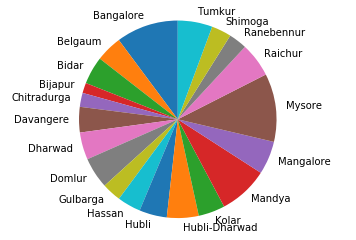

<Figure size 1800x1800 with 0 Axes>

In [38]:
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state
air=df.copy()
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
def location_avgs(state, indicator):
    locs = air[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    """sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks(rotation = 90)"""
    plt.pie(state_avgs[indicator],labels=state_avgs['location'], startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')  
    #plt.tight_layout()
    plt.figure(figsize=(25,25))
    plt.show()
location_avgs("Karnataka", "so2")

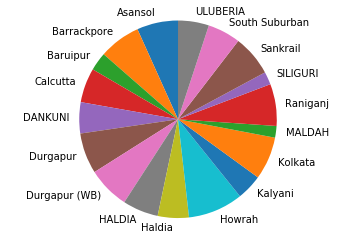

<Figure size 1800x1800 with 0 Axes>

In [39]:
location_avgs("West Bengal","no2")

In [42]:
import pingouin as pg
print("so2 vs no2")
print(pg.corr(x=df["so2"],y=df["no2"]))
print("\nso2 vs spm")
print(pg.corr(x=df["so2"],y=df["spm"]))
print("\nso2 vs rspm")
print(pg.corr(x=df["so2"],y=df["rspm"]))
print("-------------------------------------------------------------")
print("no2 vs so2")
print(pg.corr(x=df["no2"],y=df["so2"]))
print("\nno2 vs rspm")
print(pg.corr(x=df["no2"],y=df["rspm"]))
print("\nno2 vs spm")
print(pg.corr(x=df["no2"],y=df["spm"]))
print("\n--------------------------------------------------------------")
print("spm vs so2")
print(pg.corr(x=df["spm"],y=df["so2"]))
print("\nspm vs no2")
print(pg.corr(x=df["spm"],y=df["no2"]))
print("\nspm vs rspm")
print(pg.corr(x=df["spm"],y=df["rspm"]))
print("\n----------------------------------------------------------------")
print("rspm vs so2")
print(pg.corr(x=df["rspm"],y=df["so2"]))
print("\nrspm vs no2")
print(pg.corr(x=df["rspm"],y=df["no2"]))
print("\nrspm vs spm")
print(pg.corr(x=df["rspm"],y=df["spm"]))



so2 vs no2
              n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  435742  0.332  [0.33, 0.34]  0.111   0.111    0.0  inf    1.0

so2 vs spm
              n      r        CI95%     r2  adj_r2  p-val BF10  power
pearson  435742  0.093  [0.09, 0.1]  0.009   0.009    0.0  inf    1.0

so2 vs rspm
              n      r         CI95%    r2  adj_r2  p-val BF10  power
pearson  435742  0.141  [0.14, 0.14]  0.02    0.02    0.0  inf    1.0
-------------------------------------------------------------
no2 vs so2
              n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  435742  0.332  [0.33, 0.34]  0.111   0.111    0.0  inf    1.0

no2 vs rspm
              n     r         CI95%     r2  adj_r2  p-val BF10  power
pearson  435742  0.34  [0.34, 0.34]  0.115   0.115    0.0  inf    1.0

no2 vs spm
              n     r         CI95%     r2  adj_r2  p-val BF10  power
pearson  435742  0.22  [0.22, 0.22]  0.048   0.048    0.0  inf    1.0

---------------------

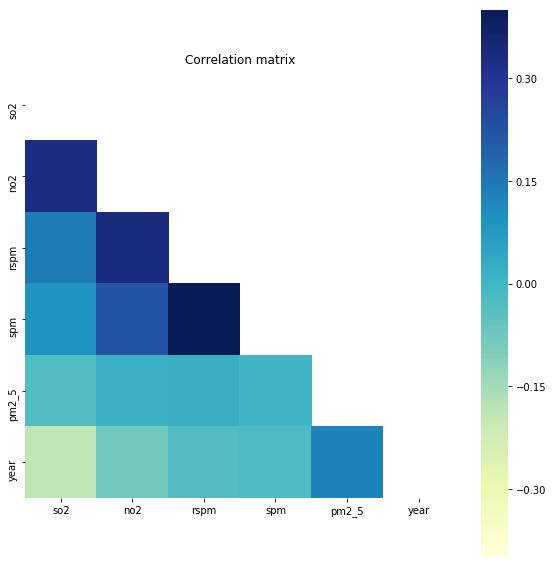

In [41]:
plt.figure(figsize=(8, 8))
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='YlGnBu', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')
plt.tight_layout()

[Text(0.5, 0, 'so2'),
 Text(1.5, 0, 'no2'),
 Text(2.5, 0, 'rspm'),
 Text(3.5, 0, 'spm'),
 Text(4.5, 0, 'pm2_5'),
 Text(5.5, 0, 'year')]

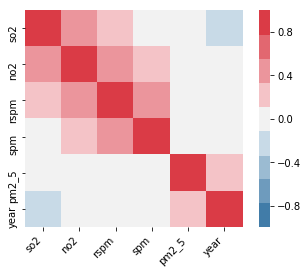

In [40]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

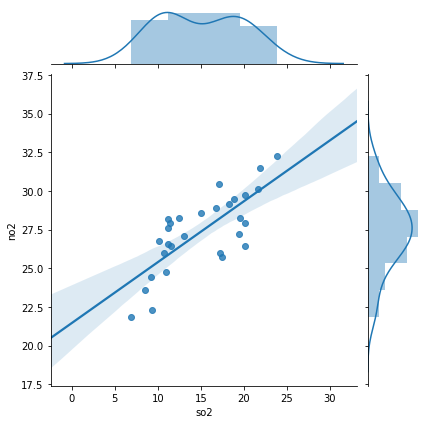

In [38]:
# defining a function to plot the relationship between two indicators on yearly averages.
def relation(ind1="so2", ind2="no2"):
    relation = sns.jointplot(x=ind1, y=ind2, data=df.set_index('date').resample('Y').mean(), kind='reg')
relation()

<Figure size 720x720 with 0 Axes>

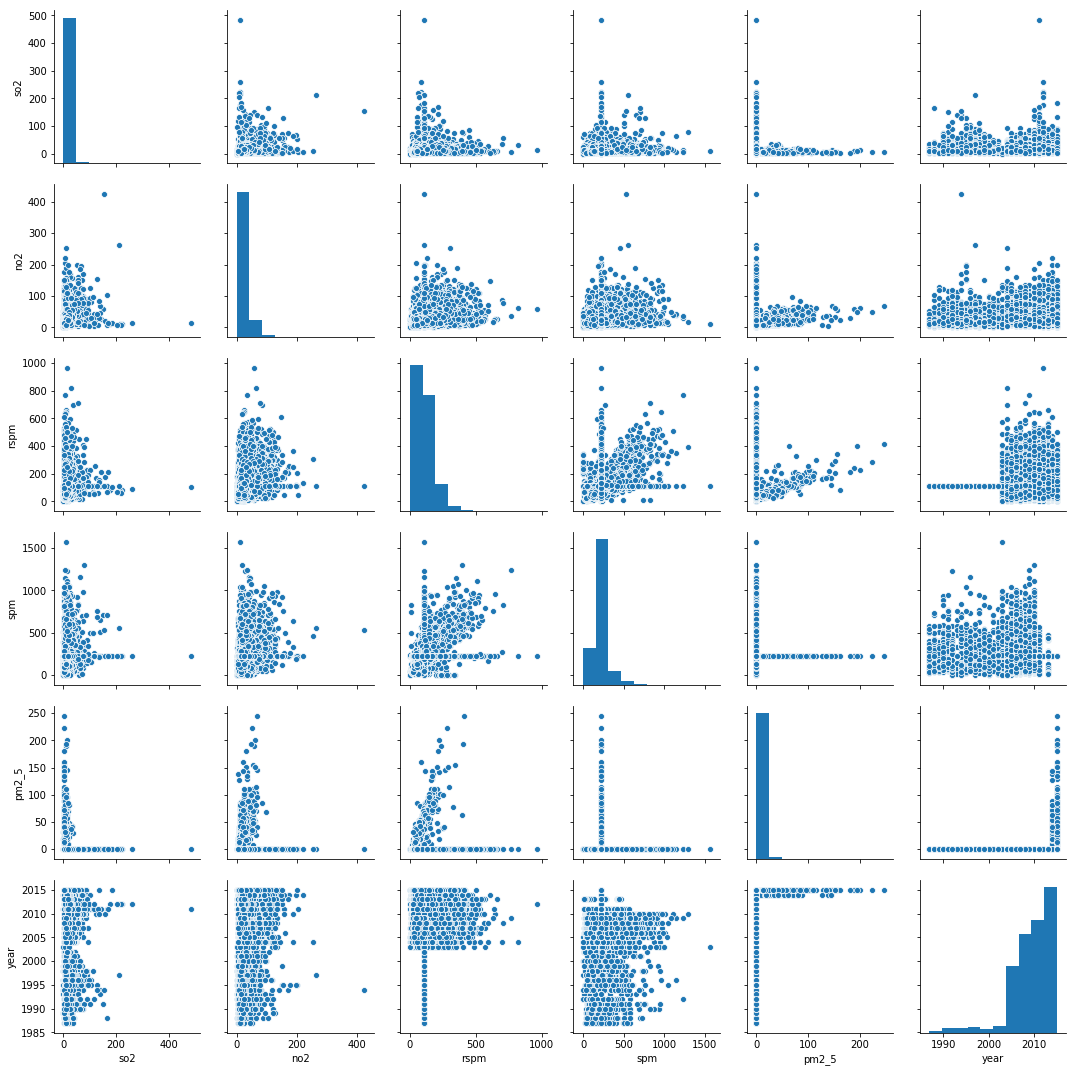

In [37]:
plt.figure(figsize=(10,10))
sns.pairplot(df.sample(25000),palette="pastel")